In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_generator, Spectra_extrapolate, Spectra_interpolation,Flux_interpolation,Flux_generator, Signal_PDF
from scipy.interpolate import splrep, splev
from ipynb.fs.full.func_plot_histo import plot_projections

In [2]:
mass=1e8
process = 'decay'
channel = 'nuenue'
galactic_profile = profile.Burkert

In [3]:
SpectraNoExtra = Spectra_generator(mass=mass, channel=channel, process=process)
SpectraExtra = Spectra_extrapolate(mass=mass, channel=channel, process=process, source=True)
EnergyRange = SpectraNoExtra.iniE()
SpectraNoExtraHalo = SpectraNoExtra.iniFlux('Halo')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


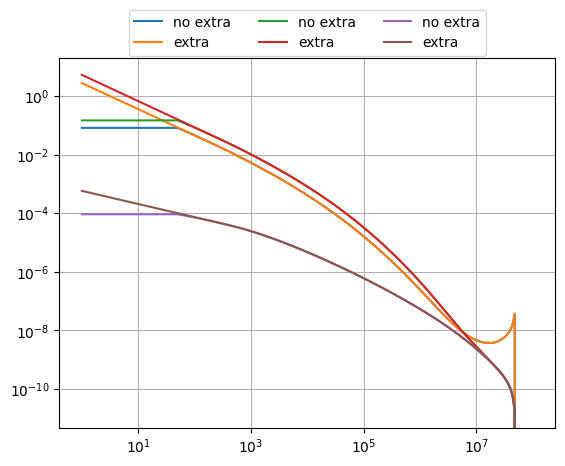

In [4]:
nu_flavor = ['nu_e','nu_mu','nu_tau']
plt.yscale('log')
plt.semilogx()
plt.grid()
for i, nu_flavor in enumerate(nu_flavor):
    plt.plot(EnergyRange, 2*SpectraNoExtraHalo[nu_flavor]/mass, label='no extra')
    plt.plot(EnergyRange, SpectraExtra[i], label='extra')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3, fancybox=True, shadow=False)

In [5]:
FluxInterpNoEx = Flux_interpolation(mass=mass, channel=channel, process=process, source=False, extrapolation=False, galactic_profile=galactic_profile)
FluxInterpEx = Flux_interpolation(mass=mass, channel=channel, process=process, source=False, extrapolation=True, galactic_profile=galactic_profile)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [6]:
FluxEnergyNoEx, FluxThetaNoEx = FluxInterpNoEx[0].T.sum(axis=0), FluxInterpNoEx[0].T.sum(axis=1)
FluxEnergyEx, FluxThetaEx = FluxInterpEx[0].T.sum(axis=0), FluxInterpEx[0].T.sum(axis=1)

In [7]:
resp_matrix_data = np.load('Response matrix/Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")
Theta_true_center=resp_matrix_data['Bin']['true_psi_center']
E_true_center=resp_matrix_data['Bin']['true_energy_center']
Theta_reco_center=resp_matrix_data['Bin']['reco_psi_center']
E_reco_center=resp_matrix_data['Bin']['reco_energy_center']
Theta_true_edges = resp_matrix_data['Bin']['true_psi_edges']
E_true_edges = resp_matrix_data['Bin']['true_energy_edges']
Theta_reco_edges = resp_matrix_data['Bin']['reco_psi_edges']
E_reco_edges = resp_matrix_data['Bin']['reco_energy_edges']

Text(0.5, 23.52222222222222, '$\\psi_{true}$ (deg)')

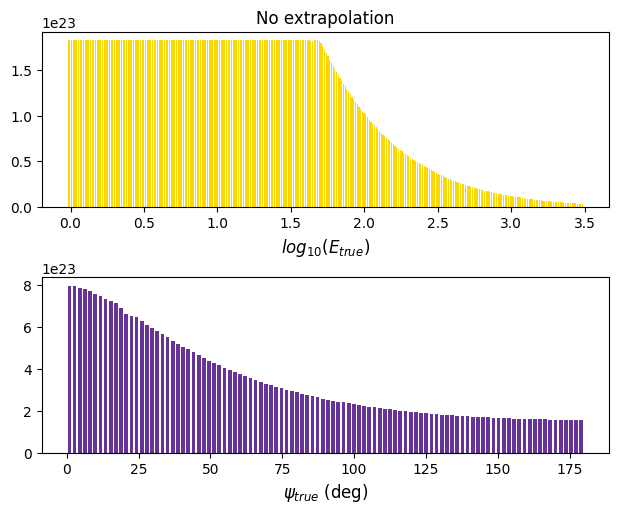

In [8]:
fig, ax = plt.subplots(2,1)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.subplot(211)
plt.title('No extrapolation')
plt.bar(np.log10(E_true_center), FluxEnergyNoEx, width=0.008, color='gold')
#plt.semilogx()
plt.xlabel(r'$log_{10}(E_{true})$', fontsize=12)
plt.subplot(212)
plt.bar(Theta_true_center, FluxThetaNoEx, color='rebeccapurple', width=1.3)
plt.xlabel(r'$\psi_{true}$ (deg)', fontsize=12)

Text(0.5, 23.52222222222222, '$\\psi_{true}$ (deg)')

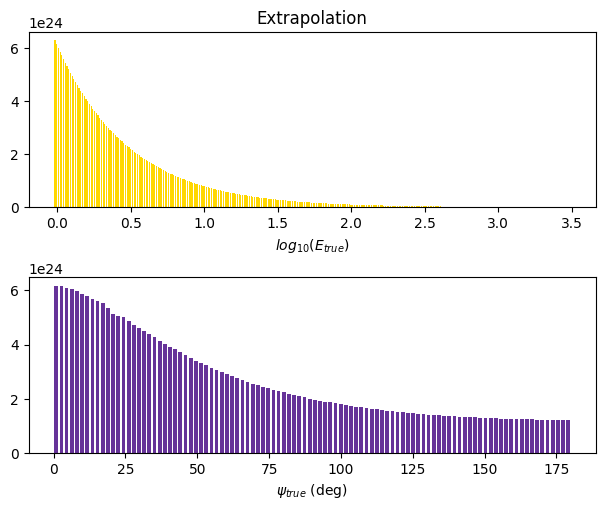

In [9]:
fig, ax = plt.subplots(2,1)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.subplot(211)
plt.title('Extrapolation')
plt.bar(np.log10(E_true_center), FluxEnergyEx,width=0.008, color='gold')
#plt.semilogx()
plt.xlabel(r'$log_{10}(E_{true})$')
plt.subplot(212)
plt.bar(Theta_true_center, FluxThetaEx, color='rebeccapurple', width=1.3)
plt.xlabel(r'$\psi_{true}$ (deg)')

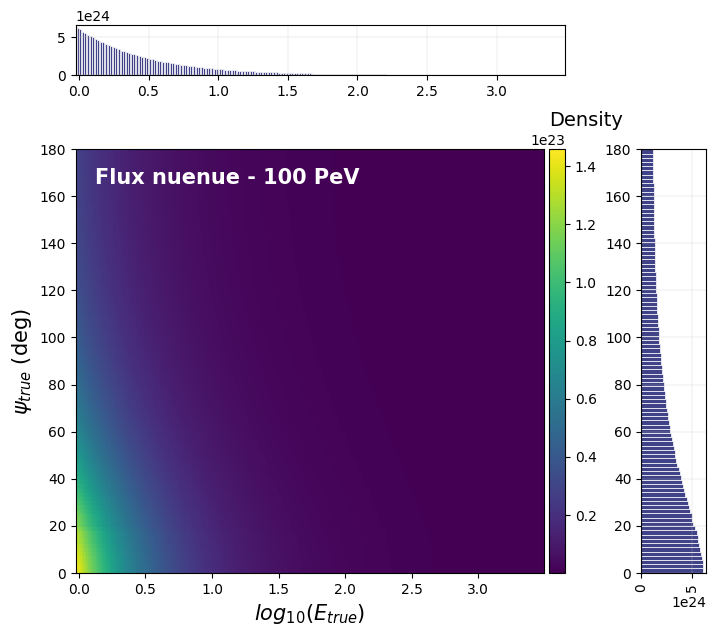

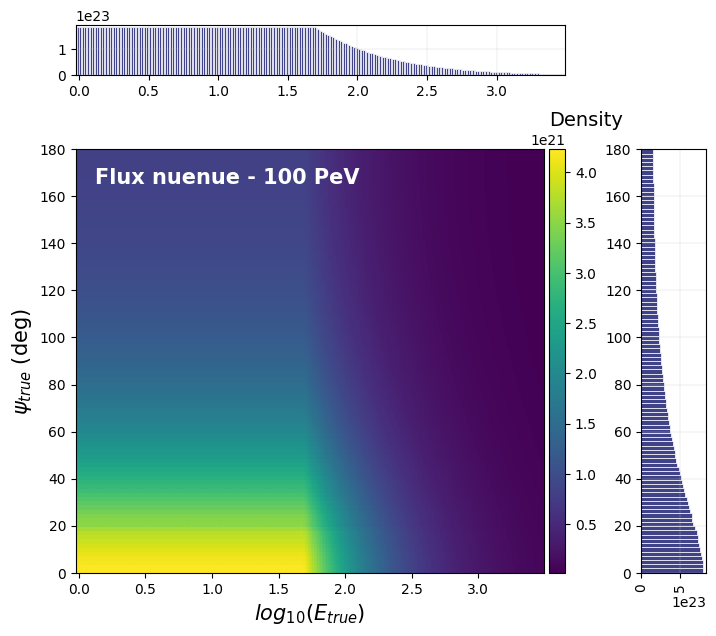

In [10]:
plot_projections(FluxInterpEx[0], (np.log10(E_true_edges),Theta_true_edges),'$log_{10}(E_{true})$','$\psi_{true}$ (deg)','Flux {0} - {1} PeV'.format(channel,int(mass/1e6)))
plot_projections(FluxInterpNoEx[0], (np.log10(E_true_edges),Theta_true_edges),'$log_{10}(E_{true})$','$\psi_{true}$ (deg)','Flux {0} - {1} PeV'.format(channel,int(mass/1e6)))

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


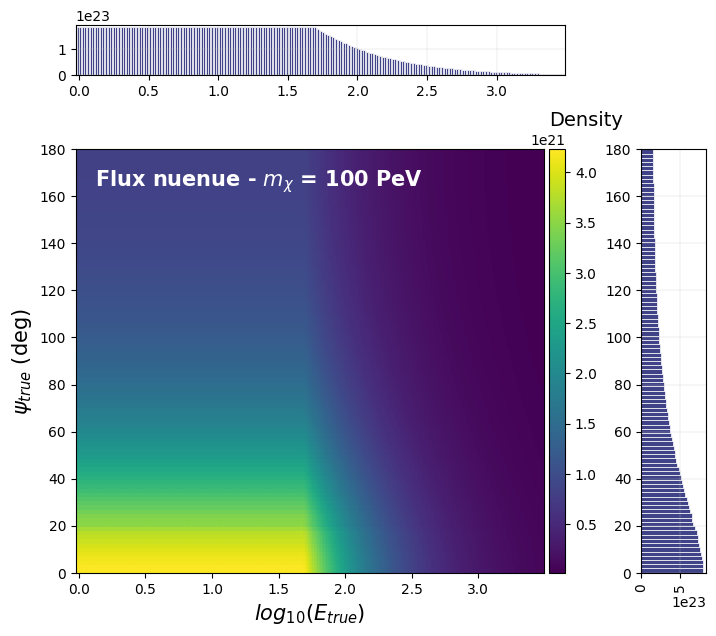

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


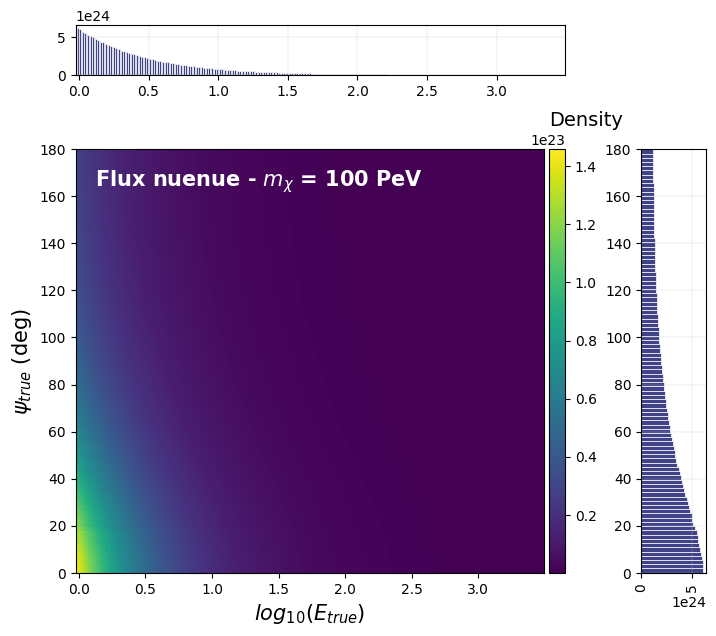

In [11]:
SignalNoEx = Signal_PDF(mass=mass, channel=channel,process=process,galactic_profile=galactic_profile, extrapolation=False, normalize=False)
SignalEx = Signal_PDF(mass=mass, channel=channel,process=process,galactic_profile=galactic_profile, extrapolation=True, normalize=False)

In [12]:
SignalEnergyNoEx, SignalThetaNoEx = SignalNoEx.T.sum(axis=1), SignalNoEx.T.sum(axis=0)
SignalEnergyEx, SignalThetaEx = SignalEx.T.sum(axis=1), SignalEx.T.sum(axis=0)

Text(0.5, 23.52222222222222, '$\\psi_{reco}$ (deg)')

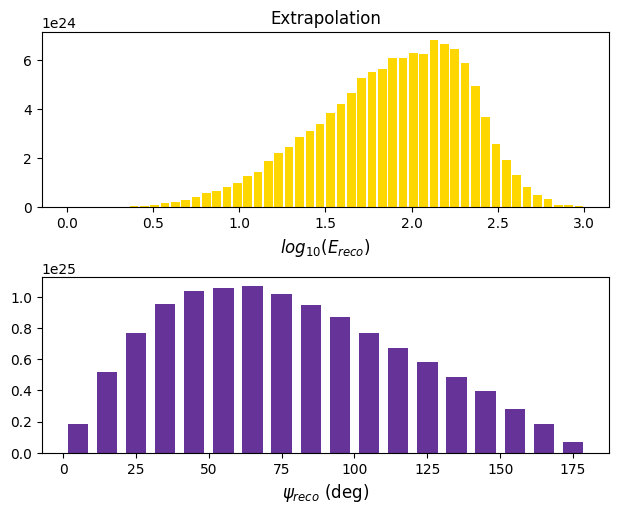

In [13]:
fig, ax = plt.subplots(2,1)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.subplot(211)
plt.title('Extrapolation')
plt.bar(np.log10(E_reco_center), SignalEnergyEx, width=0.05, color='gold')
plt.xlabel(r'$log_{10}(E_{reco})$', fontsize=12)
plt.subplot(212)
plt.bar(Theta_reco_center, SignalThetaEx, color='rebeccapurple', width=7)
plt.xlabel(r'$\psi_{reco}$ (deg)', fontsize=12)

Text(0.5, 23.52222222222222, '$\\psi_{reco}$ (deg)')

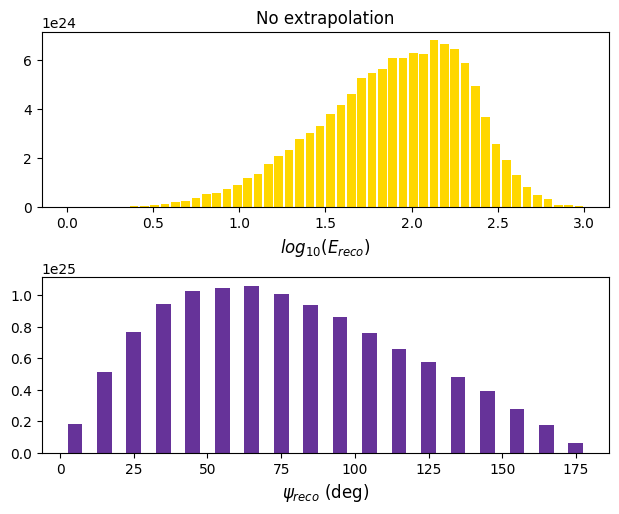

In [14]:
fig, ax = plt.subplots(2,1)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.subplot(211)
plt.title('No extrapolation')
plt.bar(np.log10(E_reco_center), SignalEnergyNoEx, width=0.05, color='gold')
plt.xlabel(r'$log_{10}(E_{reco})$', fontsize=12)
plt.subplot(212)
plt.bar(Theta_reco_center, SignalThetaNoEx, color='rebeccapurple', width=5)
plt.xlabel(r'$\psi_{reco}$ (deg)', fontsize=12)

Text(0.5, 0, '$log_{10}(E_{reco})$')

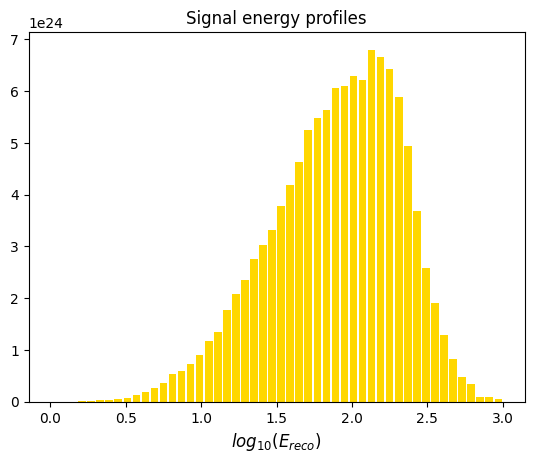

In [22]:
plt.title('Signal energy profiles')
plt.bar(np.log10(E_reco_center), SignalEnergyNoEx, width=0.05, color='gold')
#plt.bar(np.log10(E_reco_center), SignalEnergyEx, width=0.05, color='coral')
plt.xlabel(r'$log_{10}(E_{reco})$', fontsize=12)

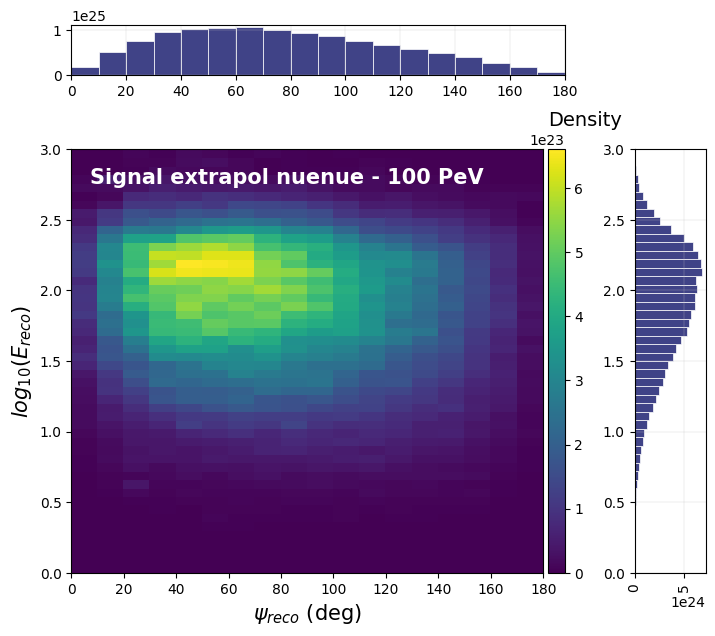

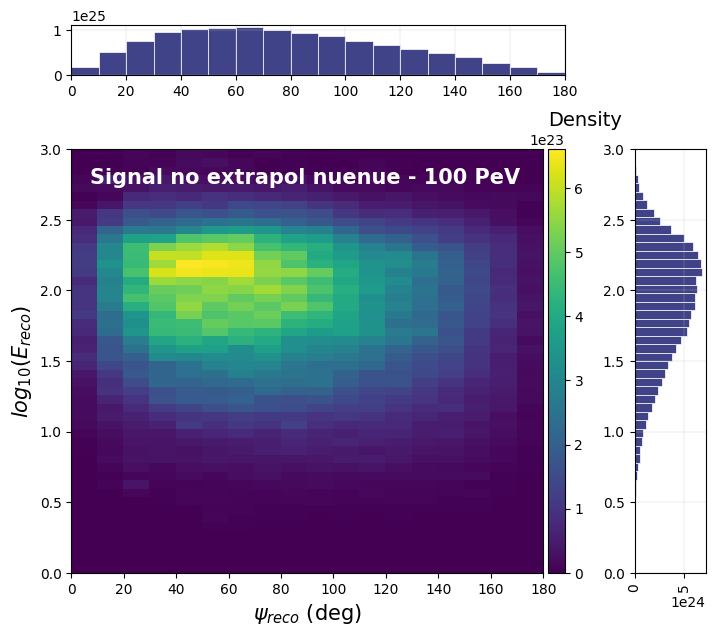

In [19]:
plot_projections(SignalEx, (Theta_reco_edges, np.log10(E_reco_edges)),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','Signal extrapol {0} - {1} PeV'.format(channel,int(mass/1e6)))
plot_projections(SignalNoEx, (Theta_reco_edges, np.log10(E_reco_edges)),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','Signal no extrapol {0} - {1} PeV'.format(channel,int(mass/1e6)))